In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Specify the path to your Excel file
file_path = '/Users/sakshiagarwal/Documents/Capstone/ECDB_export_stores_20240410220604.xlsx'
# Load the second sheet of the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name=1)

In [3]:
# Filter top 10 companies based on the 'Filtered revenue (mUSD)' column
top_10_companies = df.nlargest(10, 'Filtered revenue (mUSD)')

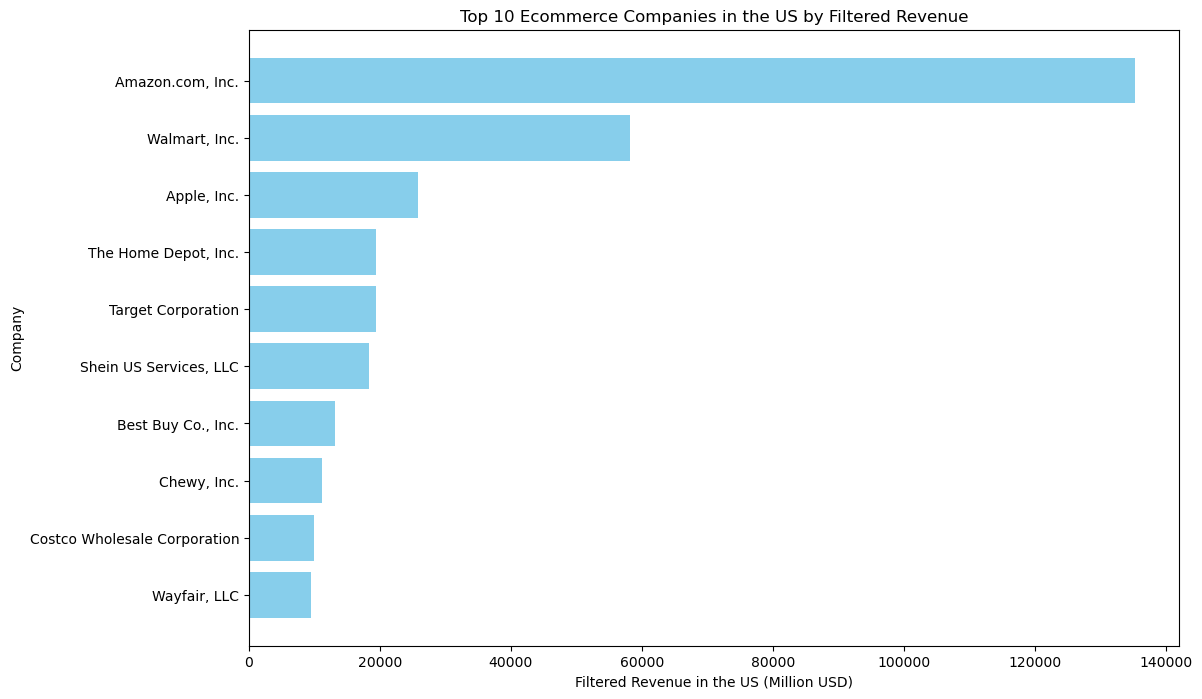

In [4]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_companies['Company'], top_10_companies['Filtered revenue (mUSD)'], color='skyblue')
plt.xlabel('Filtered Revenue in the US (Million USD)')
plt.ylabel('Company')
plt.title('Top 10 Ecommerce Companies in the US by Filtered Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to have the company with the highest revenue on top
plt.show()

Amazon is ranked 1 among all the ecommerce companies in the United States with the highest revenue generated of about $135K dollars. Let's dive deeper to understand what drives Amazon's revenue to make it the number one company in the united states.

Data Source: eMarketer

## Top Product Categories in 2024

In [5]:
# Load the CSV file into a DataFrame
file_path_csv = '/Users/sakshiagarwal/Documents/Capstone/Amazon Retail Ecommerce Sales Share, by Product Category_ % of Total Retail Sales-2.csv'
df_amazon_csv = pd.read_csv(file_path_csv)

In [6]:
# Convert percentage strings to float values
for year in range(2016, 2025):  # Adjust years as necessary
    df_amazon_csv[str(year)] = df_amazon_csv[str(year)].str.rstrip('%').astype('float') / 100

In [7]:
# Calculate the growth rate from the first available year to 2024 for each category
df_amazon_csv['Growth Rate 2016-2024'] = ((df_amazon_csv['2024'] - df_amazon_csv['2016']) / df_amazon_csv['2016']) * 100

In [8]:
# Sorting categories based on their 2024 share to identify top performers
df_amazon_csv_sorted_2024 = df_amazon_csv.sort_values('2024', ascending=False)

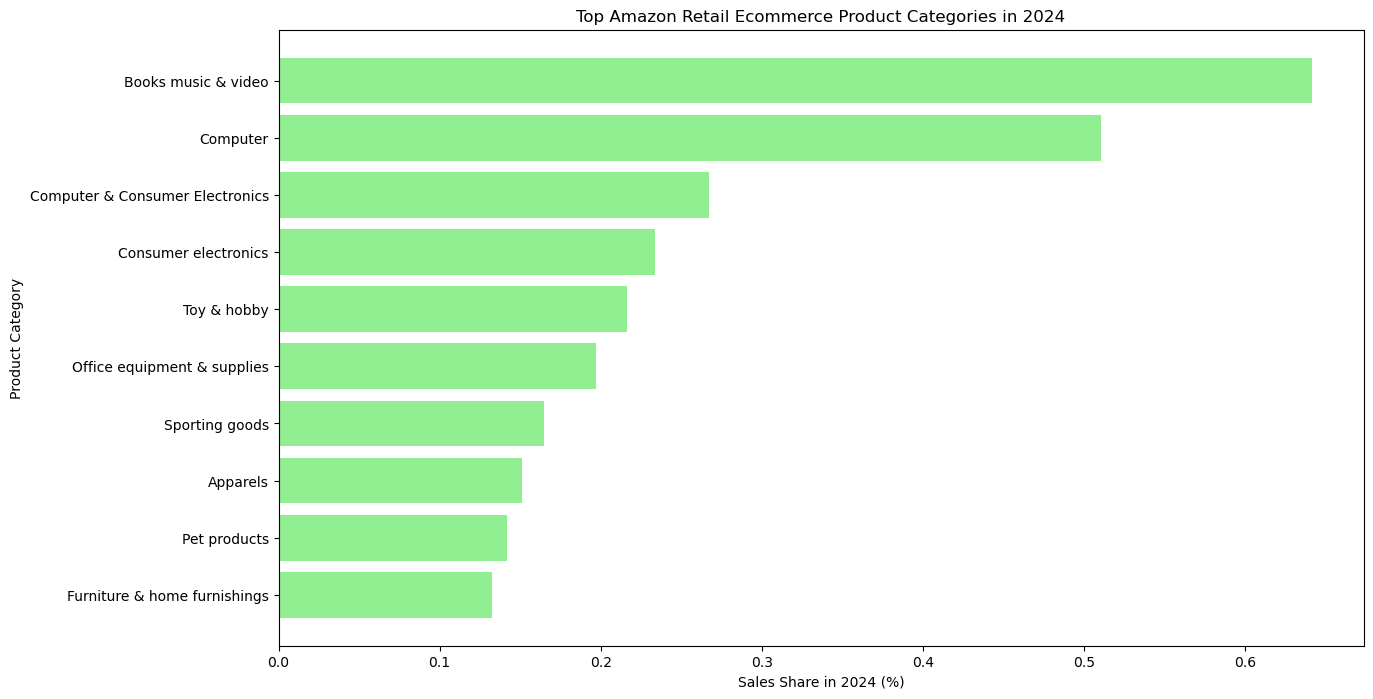

In [9]:
# Visualization of top 10 product categories in 2024
top_categories_2024 = df_amazon_csv_sorted_2024.head(10)
plt.figure(figsize=(14, 8))
plt.barh(top_categories_2024['Product Category'], top_categories_2024['2024'], color='lightgreen')
plt.xlabel('Sales Share in 2024 (%)')
plt.ylabel('Product Category')
plt.title('Top Amazon Retail Ecommerce Product Categories in 2024')
plt.gca().invert_yaxis()  # Highest shares at the top
plt.show()

In [10]:
# Print out the categories with the highest and lowest growth rates for further analysis
print("Top 5 Categories by Growth Rate (2016-2024):")
print(df_amazon_csv[['Product Category', 'Growth Rate 2016-2024']].sort_values(by='Growth Rate 2016-2024', ascending=False).head())

Top 5 Categories by Growth Rate (2016-2024):
                  Product Category  Growth Rate 2016-2024
11                 Food & beverage             443.333333
13   Health personal care & beauty             316.265060
20                    Pet products             315.542522
12    Furniture & home furnishings             212.028302
0   Apparel footwear & accessories             184.918794


In [11]:
print("\nCategories with Insufficient Data or Lowest Growth:")
print(df_amazon_csv[['Product Category', 'Growth Rate 2016-2024']].sort_values(by='Growth Rate 2016-2024', ascending=True).head())


Categories with Insufficient Data or Lowest Growth:
                   Product Category  Growth Rate 2016-2024
7   Computer & Consumer Electronics             105.850654
5                      Auto & parts             109.677419
21      Office equipment & supplies             126.436782
24                 Other categories             144.094488
6               Books music & video             150.683861


The data for 2024 only contains the first two months so lets check the growth upto 2023 to get a more clear picture of which categories are performing the best

In [12]:
# Calculate the growth rate from the first available year to 2023 for each category
df_amazon_csv['Growth Rate 2016-2023'] = ((df_amazon_csv['2023'] - df_amazon_csv['2016']) / df_amazon_csv['2016']) * 100

In [13]:
# Sorting categories based on their 2023 share to identify top performers
df_amazon_csv_sorted_2023 = df_amazon_csv.sort_values('2023', ascending=False)

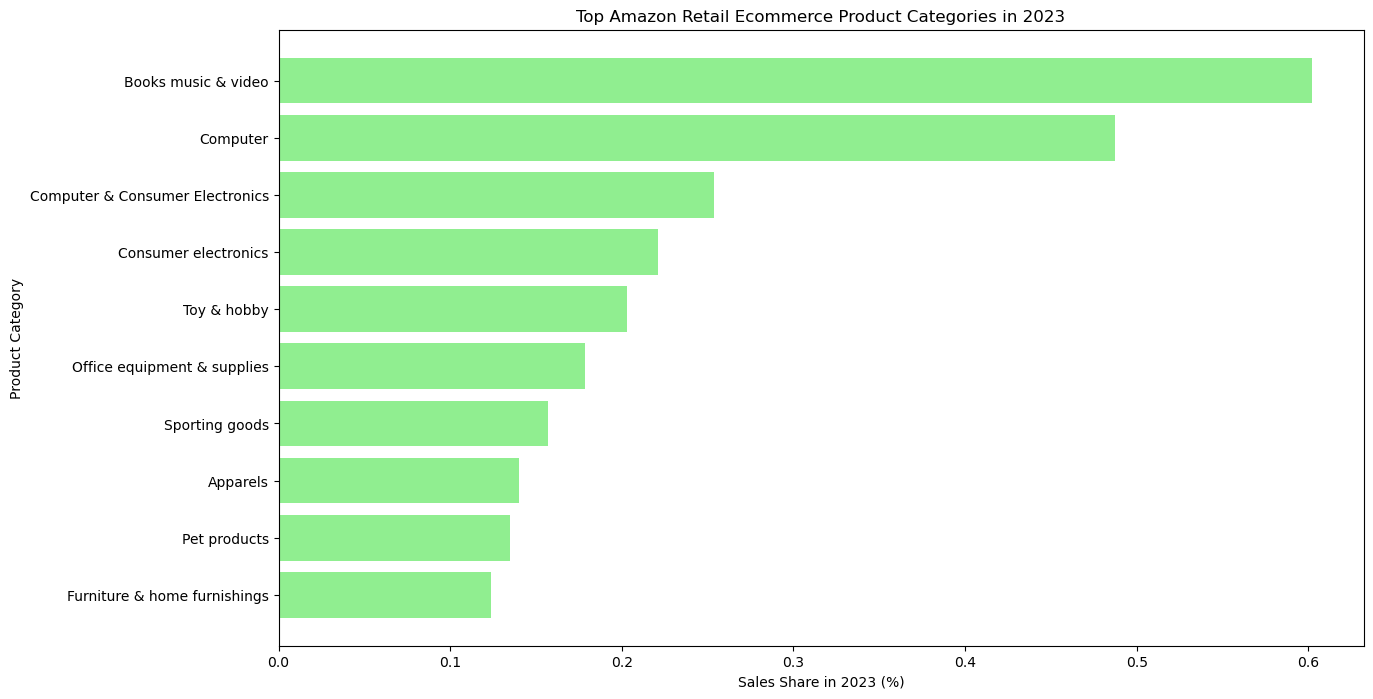

In [14]:
# Visualization of top 10 product categories in 2023
top_categories_2023 = df_amazon_csv_sorted_2023.head(10)
plt.figure(figsize=(14, 8))
plt.barh(top_categories_2023['Product Category'], top_categories_2023['2023'], color='lightgreen')
plt.xlabel('Sales Share in 2023 (%)')
plt.ylabel('Product Category')
plt.title('Top Amazon Retail Ecommerce Product Categories in 2023')
plt.gca().invert_yaxis()  # Highest shares at the top
plt.show()

In [15]:
# Print out the categories with the highest and lowest growth rates for further analysis
print("Top 5 Categories by Growth Rate (2016-2023):")
print(df_amazon_csv[['Product Category', 'Growth Rate 2016-2023']].sort_values(by='Growth Rate 2016-2023', ascending=False).head())

Top 5 Categories by Growth Rate (2016-2023):
                  Product Category  Growth Rate 2016-2023
11                 Food & beverage             400.000000
20                    Pet products             295.307918
13   Health personal care & beauty             280.722892
12    Furniture & home furnishings             191.981132
0   Apparel footwear & accessories             164.269142


In [16]:
print("\nCategories with Insufficient Data or Lowest Growth:")
print(df_amazon_csv[['Product Category', 'Growth Rate 2016-2023']].sort_values(by='Growth Rate 2016-2023', ascending=True).head())


Categories with Insufficient Data or Lowest Growth:
                   Product Category  Growth Rate 2016-2023
7   Computer & Consumer Electronics              95.227098
5                      Auto & parts              96.774194
21      Office equipment & supplies             105.402299
24                 Other categories             133.858268
6               Books music & video             135.248144


In [17]:
# Load the CSV file into a DataFrame
file_path_csv = '/Users/sakshiagarwal/Documents/Capstone/Amazon Retail Ecommerce Sales Share, by Product Category_ % of Total Retail Sales-2.csv'
df_amazon_csv = pd.read_csv(file_path_csv)

In [18]:
print(df_amazon_csv.columns)

Index(['Product Category', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')


In [19]:
# Convert percentage strings to float values and calculate YoY growth rates
df_amazon_csv.set_index('Product Category', inplace=True)  # Set product categories as the index
for year in range(2016, 2024):  # Adjust years as necessary
    df_amazon_csv[str(year)] = df_amazon_csv[str(year)].str.rstrip('%').astype('float') / 100
    if year > 2016:
        df_amazon_csv[f'Growth {year-1}-{year}'] = ((df_amazon_csv[str(year)] - df_amazon_csv[str(year-1)]) / df_amazon_csv[str(year-1)]) * 100

In [20]:
# Select columns for YoY growth rates to plot
growth_columns = [col for col in df_amazon_csv.columns if 'Growth' in col]
df_growth = df_amazon_csv[growth_columns]

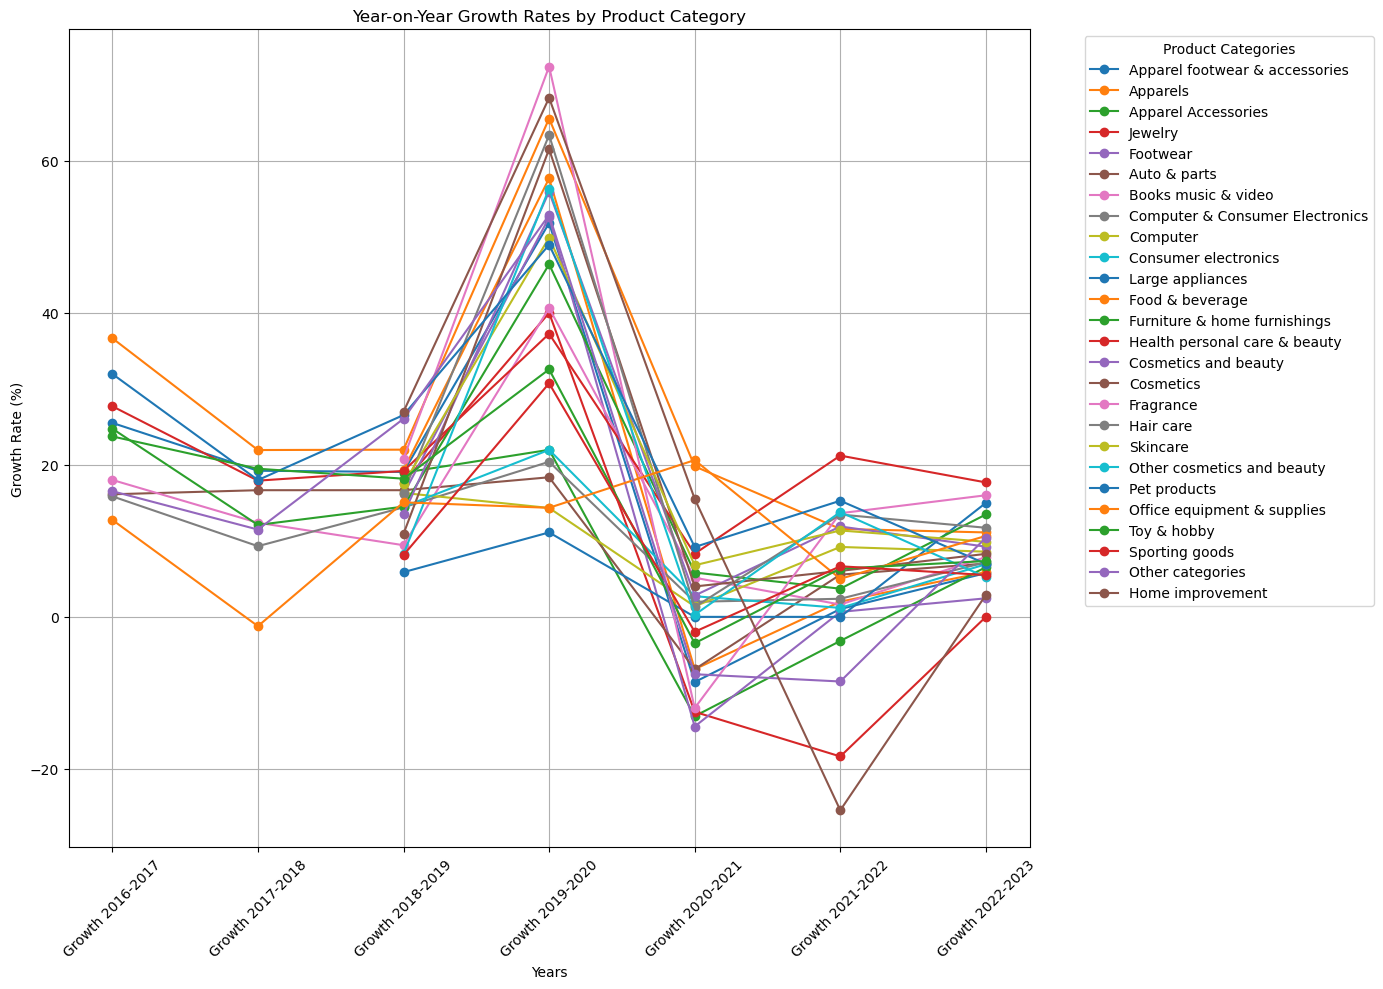

In [21]:
# Plotting YoY growth rates for each category
plt.figure(figsize=(14, 10))
for category in df_growth.index:
    plt.plot(df_growth.columns, df_growth.loc[category], marker='o', label=category)

plt.title('Year-on-Year Growth Rates by Product Category')
plt.xlabel('Years')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

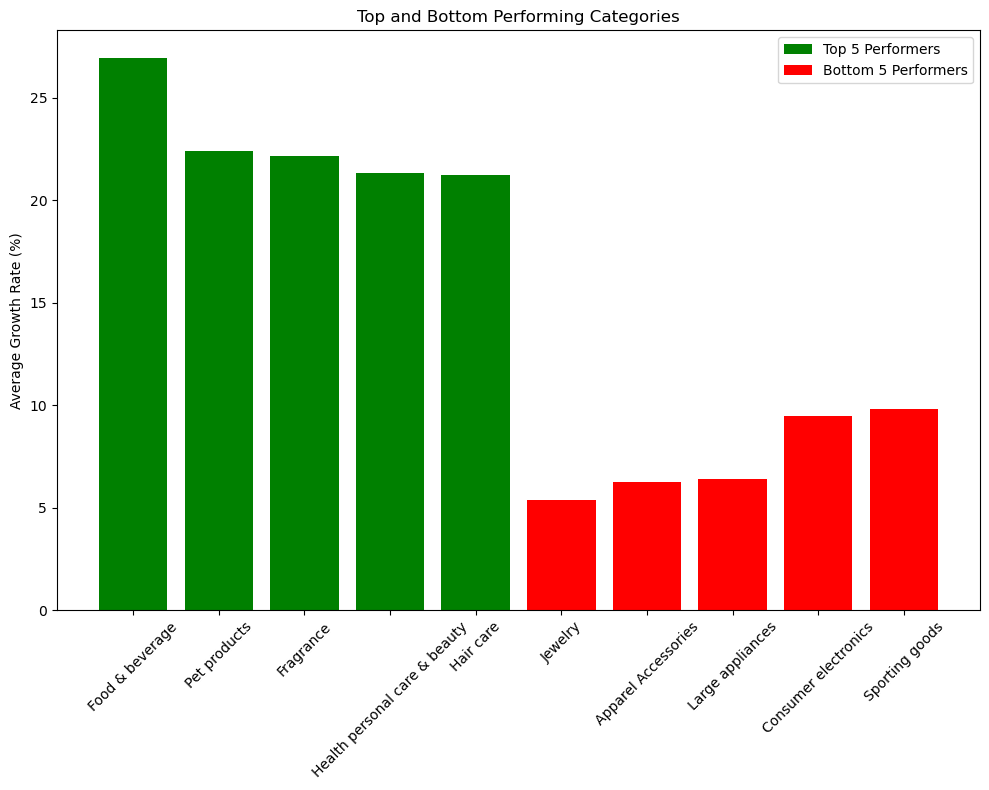

In [22]:
# Calculate the average growth rate across all years for each category
df_amazon_csv['Average Growth Rate'] = df_amazon_csv[growth_columns].mean(axis=1)

# Get top 5 and bottom 5 performers
top_5 = df_amazon_csv['Average Growth Rate'].nlargest(5)
bottom_5 = df_amazon_csv['Average Growth Rate'].nsmallest(5)

# Plot top 5 and bottom 5 performers
plt.figure(figsize=(10, 8))
plt.bar(top_5.index, top_5.values, color='green', label='Top 5 Performers')
plt.bar(bottom_5.index, bottom_5.values, color='red', label='Bottom 5 Performers')
plt.ylabel('Average Growth Rate (%)')
plt.title('Top and Bottom Performing Categories')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

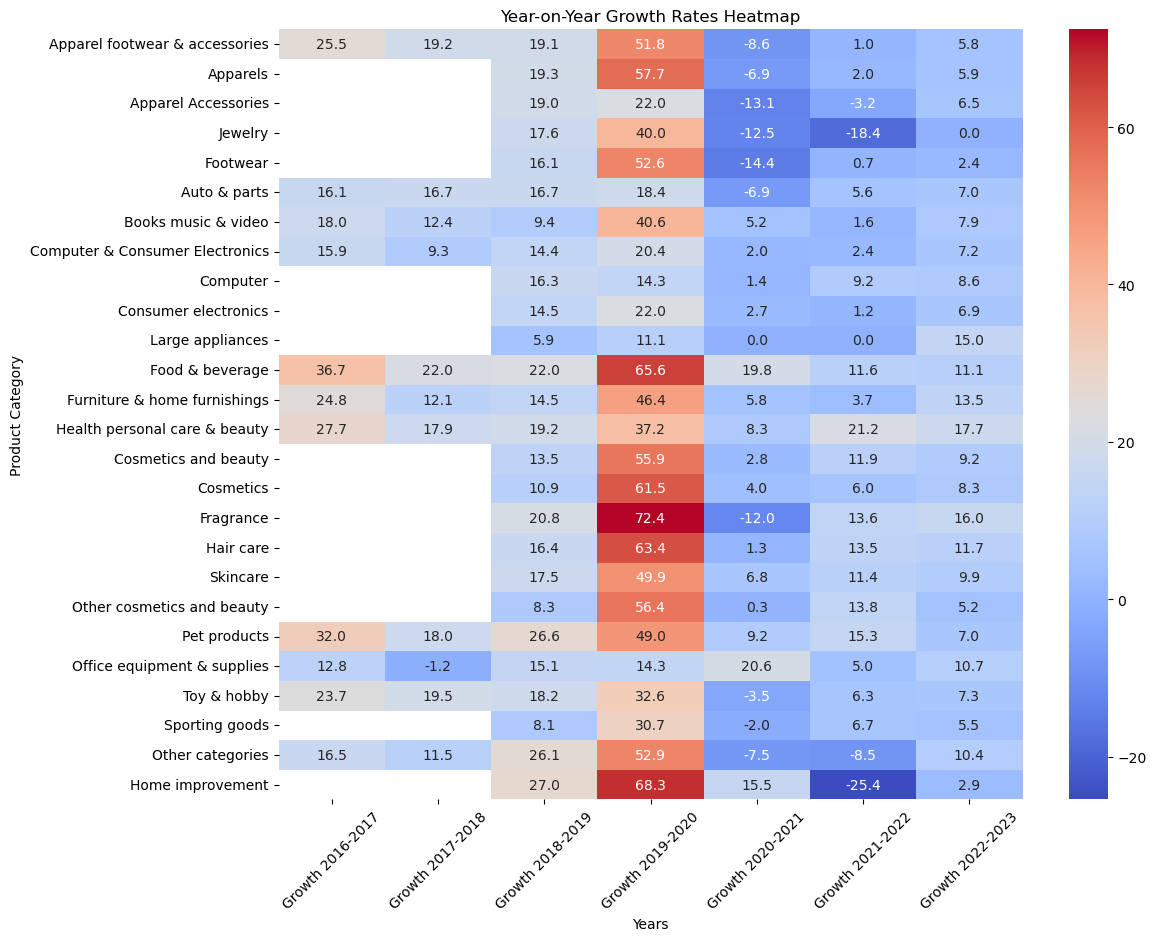

In [23]:
import seaborn as sns

# Use a heatmap to visualize the YoY growth rates
plt.figure(figsize=(12, 10))
sns.heatmap(df_amazon_csv[growth_columns], annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Year-on-Year Growth Rates Heatmap')
plt.ylabel('Product Category')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.show()

## Compound Annual Growth Rate and Predictive Modeling with Absolute Sales

In [24]:
# Load the dataset
file_path = '/Users/sakshiagarwal/Documents/Capstone/Amazon Retail Ecommerce Sales, by Product Category-3.csv'
df = pd.read_csv(file_path)

In [25]:
# Display the first few rows of the dataframe
print(df.head())

                           Metric                 2016                 2017  \
0  Apparel footwear & accessories  $18,399,030,650.61   $23,633,928,338.82    
1                        Apparels                  NaN                  NaN   
2             Apparel Accessories                  NaN                  NaN   
3                         Jewelry                  NaN                  NaN   
4                        Footwear                  NaN                  NaN   

                  2018                 2019                 2020  \
0  $28,701,348,487.40   $34,641,374,151.12   $47,659,412,296.23    
1  $22,214,843,729.24   $26,930,975,965.37   $37,693,590,326.35    
2   $3,329,356,424.54    $3,969,129,777.42    $4,770,946,029.59    
3     $143,506,742.44      $173,206,870.76      $238,297,061.48    
4   $3,157,148,333.61    $3,741,268,408.32    $5,194,875,940.29    

                  2021                 2022                 2023  \
0  $56,869,142,049.17   $61,709,790,101.91   $67

In [26]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metric  26 non-null     object
 1   2016    11 non-null     object
 2   2017    11 non-null     object
 3   2018    26 non-null     object
 4   2019    26 non-null     object
 5   2020    26 non-null     object
 6   2021    26 non-null     object
 7   2022    26 non-null     object
 8   2023    26 non-null     object
 9   2024    26 non-null     object
dtypes: object(10)
memory usage: 2.2+ KB
None


In [27]:
# Convert currency to floats and handle missing values
for year in range(2016, 2025):
    df[str(year)] = df[str(year)].replace('[\$,]', '', regex=True).astype(float)

# Checking conversion success
print(df.head())

                           Metric          2016          2017          2018  \
0  Apparel footwear & accessories  1.839903e+10  2.363393e+10  2.870135e+10   
1                        Apparels           NaN           NaN  2.221484e+10   
2             Apparel Accessories           NaN           NaN  3.329356e+09   
3                         Jewelry           NaN           NaN  1.435067e+08   
4                        Footwear           NaN           NaN  3.157148e+09   

           2019          2020          2021          2022          2023  \
0  3.464137e+10  4.765941e+10  5.686914e+10  6.170979e+10  6.760299e+10   
1  2.693098e+10  3.769359e+10  4.549051e+10  4.949125e+10  5.448801e+10   
2  3.969130e+09  4.770946e+09  5.464243e+09  5.924140e+09  6.422284e+09   
3  1.732069e+08  2.382971e+08  2.843457e+08  2.406682e+08  2.298502e+08   
4  3.741268e+09  5.194876e+09  5.914391e+09  6.294399e+09  6.692696e+09   

           2024  
0  7.571338e+10  
1  6.132784e+10  
2  7.041345e+09  
3 

In [29]:
def calculate_cagr(end_value, start_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

df['CAGR 2018-2024'] = df.apply(
    lambda row: calculate_cagr(row['2024'], row['2018'], 6) if pd.notna(row['2018']) and pd.notna(row['2024']) else np.nan, axis=1
)

# Sort the DataFrame based on the CAGR values in descending order
df_sorted = df.sort_values(by='CAGR 2018-2024', ascending=False)

# Display the CAGR for each category
print(df_sorted[['Metric', 'CAGR 2018-2024']])

                             Metric  CAGR 2018-2024
20                     Pet products       30.993642
11                  Food & beverage       29.494637
13    Health personal care & beauty       26.700981
16                        Fragrance       26.700981
18                         Skincare       25.460298
15                        Cosmetics       23.087205
14             Cosmetics and beauty       22.934916
17                        Hair care       22.818154
12     Furniture & home furnishings       22.517044
22                      Toy & hobby       20.641630
19       Other cosmetics and beauty       19.211745
1                          Apparels       18.441092
24                 Other categories       17.653139
0    Apparel footwear & accessories       17.547048
23                   Sporting goods       16.891560
25                 Home improvement       16.230553
21      Office equipment & supplies       15.723353
6               Books music & video       15.688716
4           

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select the data for 'Apparel footwear & accessories'
data = df.loc[df['Metric'] == 'Apparel footwear & accessories', '2018':'2024'].dropna().values.reshape(-1, 1)
years = np.arange(2018, 2025).reshape(-1, 1)  # years corresponding to the data

# Fit model
model = LinearRegression()
model.fit(years, data)

# Predict for the next few years
future_years = np.arange(2025, 2030).reshape(-1, 1)
predictions = model.predict(future_years)
print("Future Predictions:", predictions.flatten())

# Formatting predictions as currency
formatted_predictions = ["${:,.2f}".format(value) for value in predictions.flatten()]
print("Future Predictions:", formatted_predictions)

Future Predictions: [8.48438786e+10 9.27370826e+10 1.00630287e+11 1.08523490e+11
 1.16416694e+11]


In [31]:
# Prepare the output dictionary to store predictions for each category
predictions_dict = {}

# Iterate over each unique category in the 'Metric' column
for category in df['Metric'].unique():
    # Select the data for the current category
    data = df.loc[df['Metric'] == category, '2018':'2024'].dropna().values.reshape(-1, 1)
    years = np.arange(2018, 2025).reshape(-1, 1)  # years corresponding to the data

    # Check if there is enough data to fit the model
    if data.shape[0] == len(years):
        # Fit model
        model = LinearRegression()
        model.fit(years, data)

        # Predict for the next few years
        future_years = np.arange(2025, 2030).reshape(-1, 1)
        predictions = model.predict(future_years)

        # Formatting predictions as currency
        formatted_predictions = ["${:,.2f}".format(value) for value in predictions.flatten()]
        predictions_dict[category] = formatted_predictions
    else:
        predictions_dict[category] = 'Insufficient data for prediction'

# Print all predictions
for category, prediction in predictions_dict.items():
    print(f"Future Predictions for {category}: {prediction}")

Future Predictions for Apparel footwear & accessories: ['$84,843,878,580.83', '$92,737,082,551.45', '$100,630,286,522.07', '$108,523,490,492.70', '$116,416,694,463.32']
Future Predictions for Apparels: ['$68,841,105,144.44', '$75,421,487,904.84', '$82,001,870,665.23', '$88,582,253,425.63', '$95,162,636,186.03']
Future Predictions for Apparel Accessories: ['$7,730,987,264.23', '$8,345,111,077.39', '$8,959,234,890.55', '$9,573,358,703.71', '$10,187,482,516.87']
Future Predictions for Jewelry: ['$282,755,169.10', '$297,874,560.55', '$312,993,952.01', '$328,113,343.47', '$343,232,734.92']
Future Predictions for Footwear: ['$8,271,786,172.15', '$8,970,483,569.22', '$9,669,180,966.29', '$10,367,878,363.36', '$11,066,575,760.43']
Future Predictions for Auto & parts: ['$12,212,860,176.70', '$13,199,767,214.10', '$14,186,674,251.50', '$15,173,581,288.90', '$16,160,488,326.30']
Future Predictions for Books music & video: ['$64,608,998,302.97', '$70,403,781,535.02', '$76,198,564,767.08', '$81,993

In [32]:
# Let's create a DataFrame from this dictionary
prediction_years = [2025, 2026, 2027, 2028, 2029]
categories = list(predictions_dict.keys())
data = {year: [predictions_dict[category][i] for category in categories] for i, year in enumerate(prediction_years)}

# Construct the DataFrame
predictions_df = pd.DataFrame(data, index=categories)
predictions_df.index.name = 'Product Category'
predictions_df.columns.name = 'Year'

# Show the DataFrame
print(predictions_df)

Year                                            2025                 2026  \
Product Category                                                            
Apparel footwear & accessories    $84,843,878,580.83   $92,737,082,551.45   
Apparels                          $68,841,105,144.44   $75,421,487,904.84   
Apparel Accessories                $7,730,987,264.23    $8,345,111,077.39   
Jewelry                              $282,755,169.10      $297,874,560.55   
Footwear                           $8,271,786,172.15    $8,970,483,569.22   
Auto & parts                      $12,212,860,176.70   $13,199,767,214.10   
Books music & video               $64,608,998,302.97   $70,403,781,535.02   
Computer & Consumer Electronics  $113,195,009,825.57  $121,815,477,203.14   
Computer                          $46,794,663,384.15   $50,255,167,700.61   
Consumer electronics              $66,287,151,431.59   $71,438,494,025.33   
Large appliances                     $113,195,009.82      $121,815,477.20   

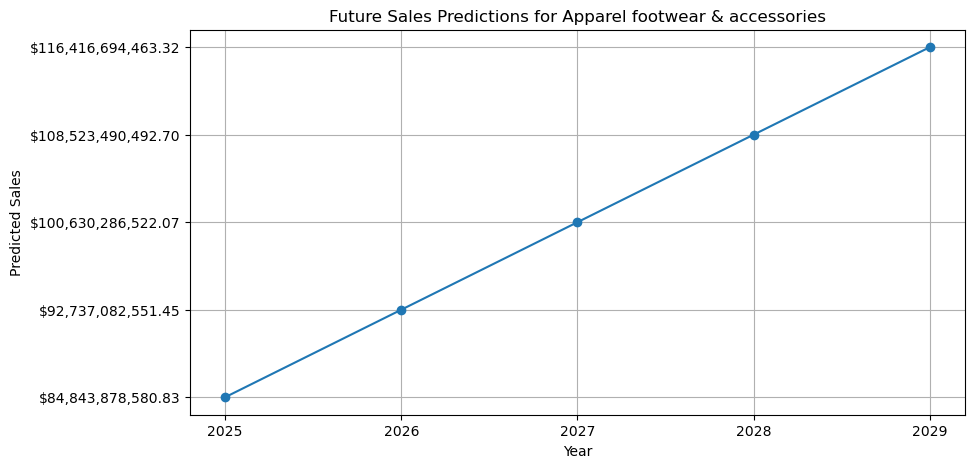

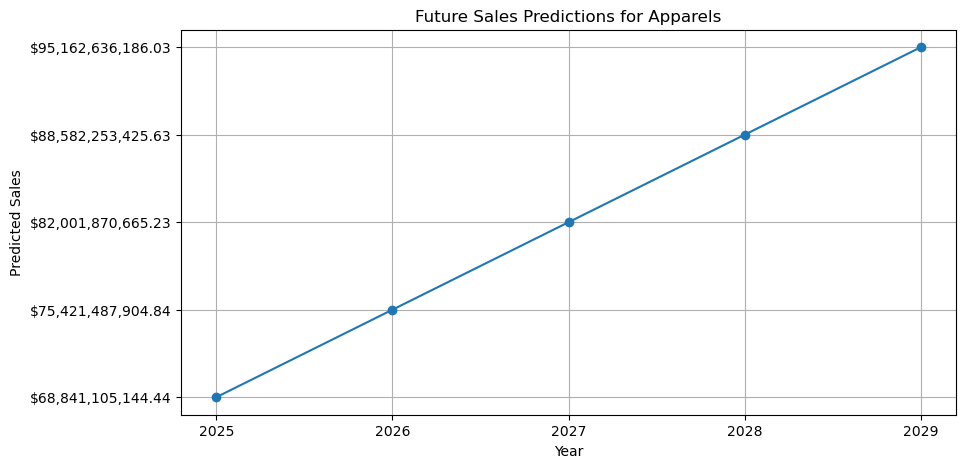

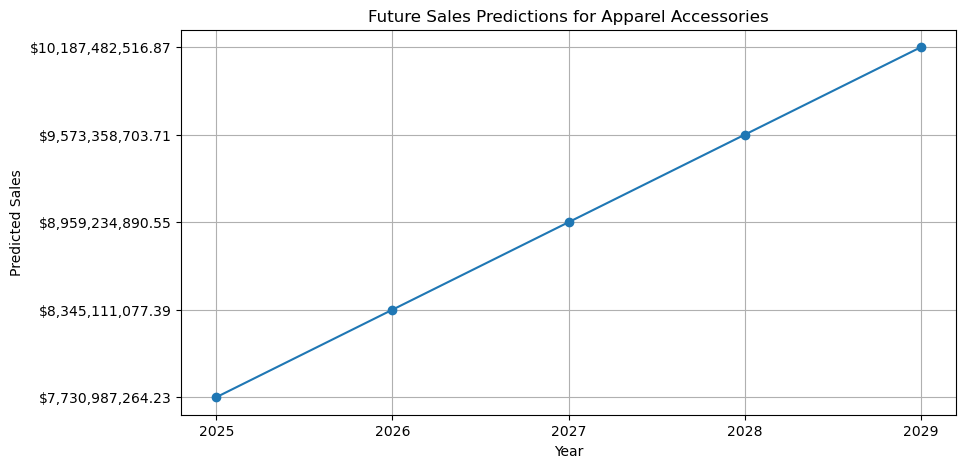

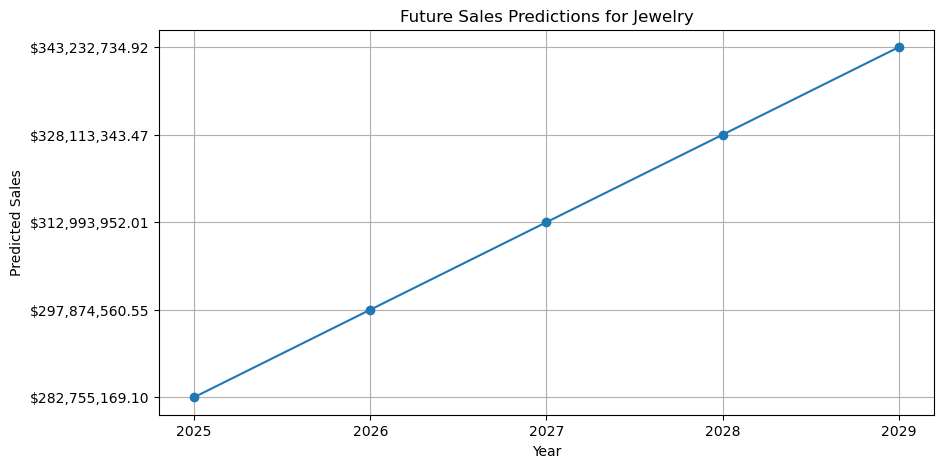

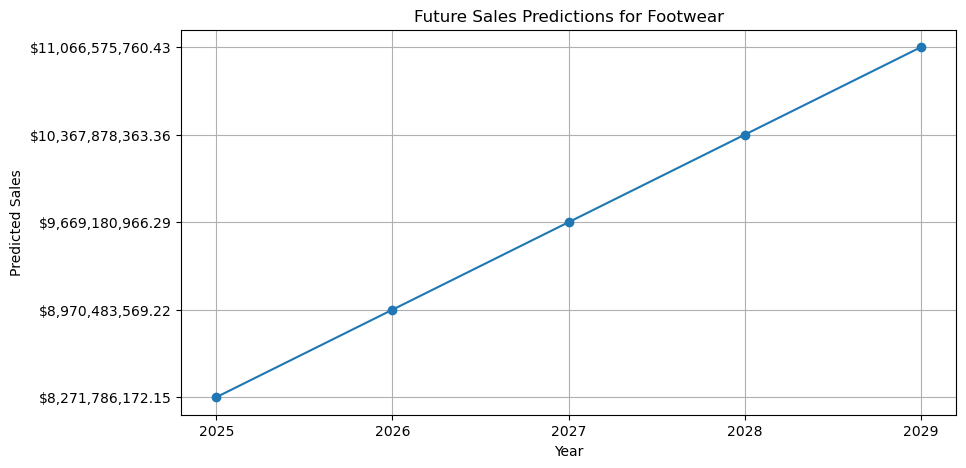

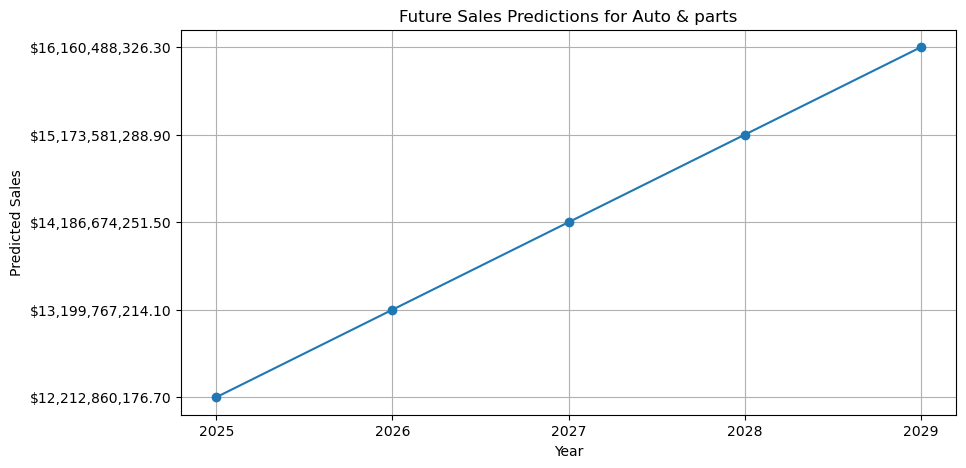

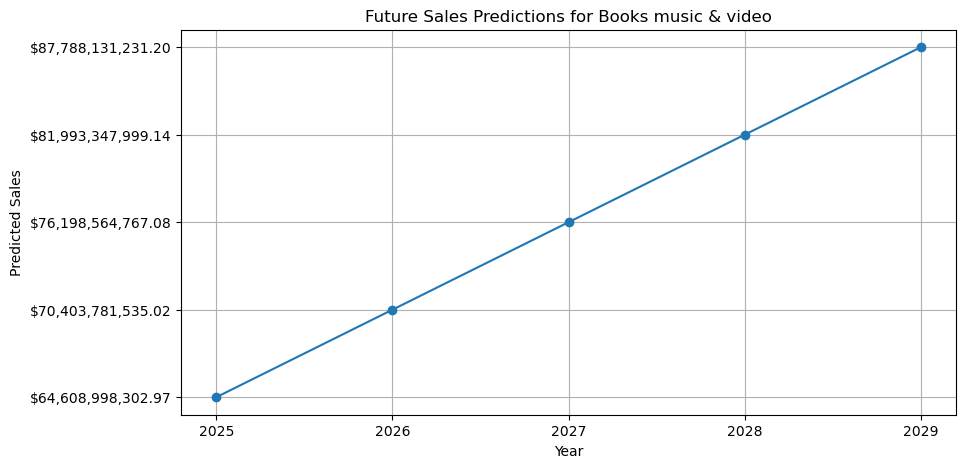

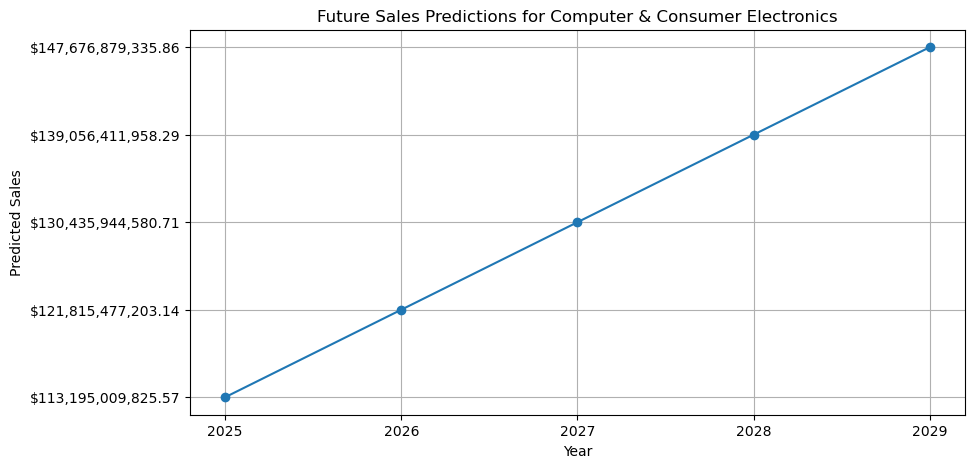

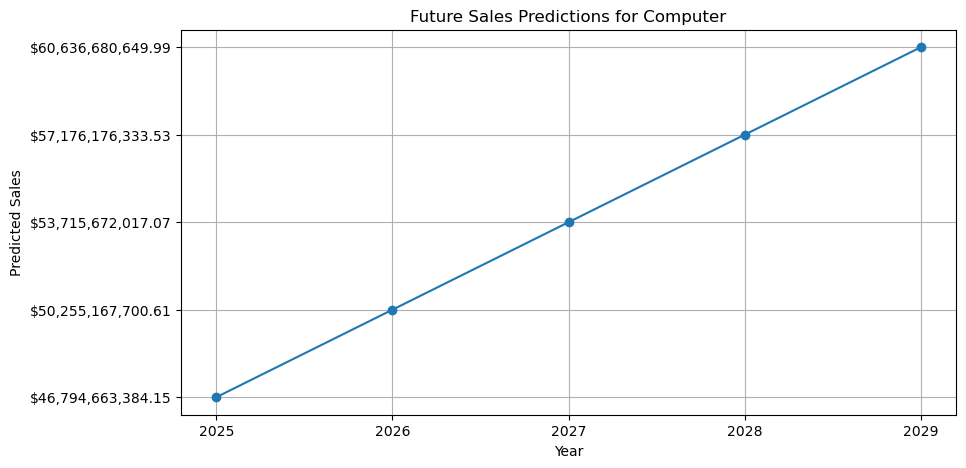

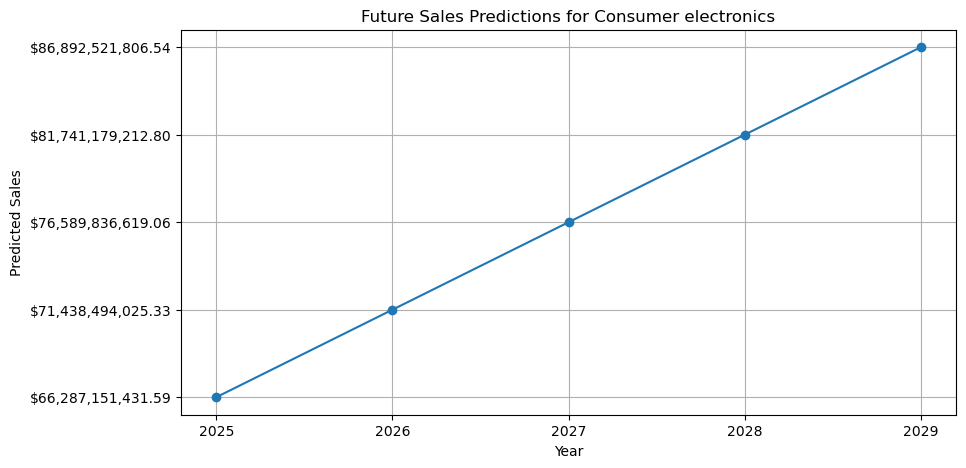

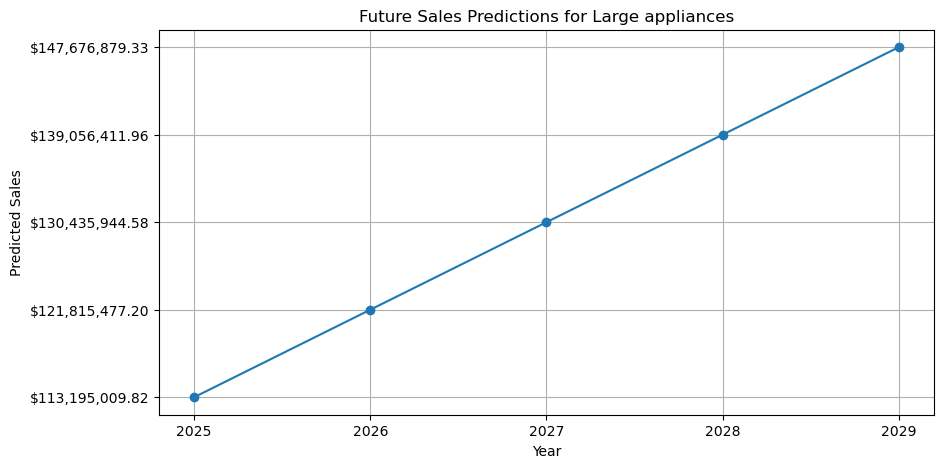

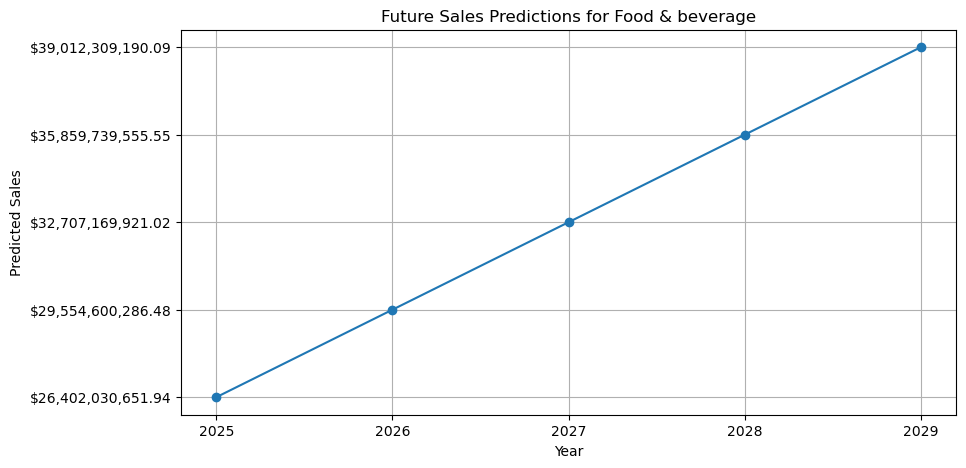

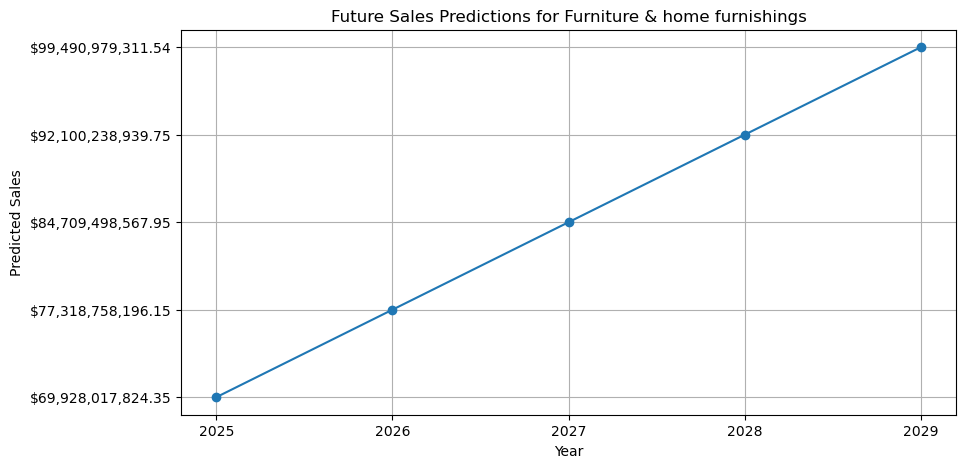

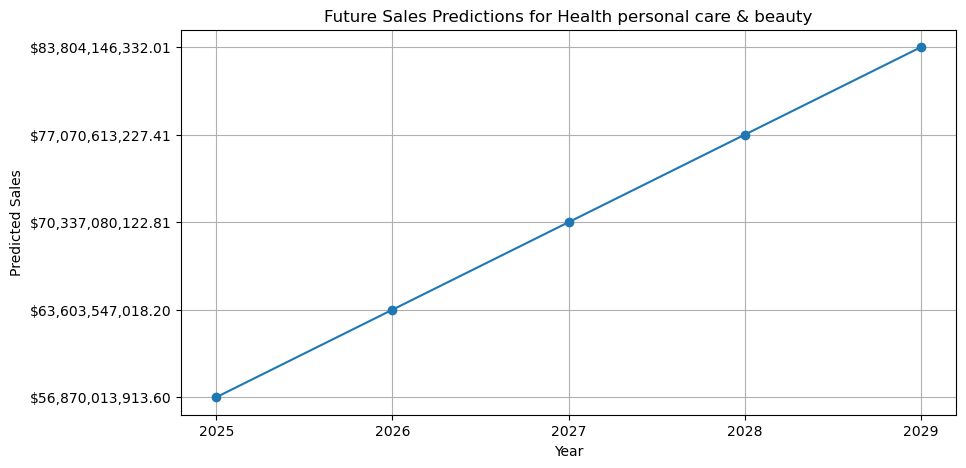

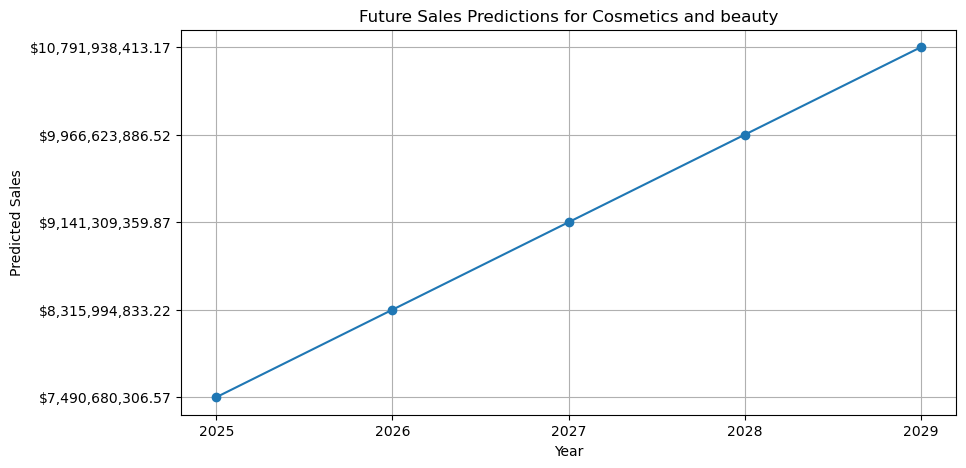

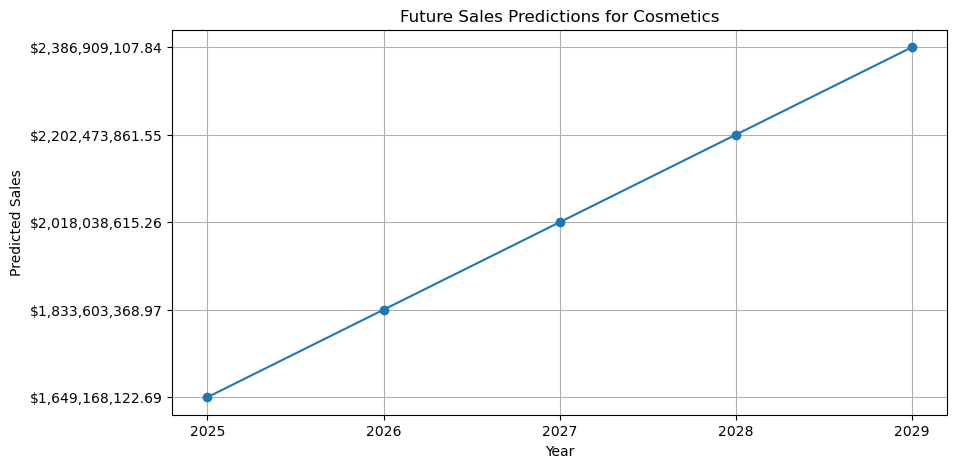

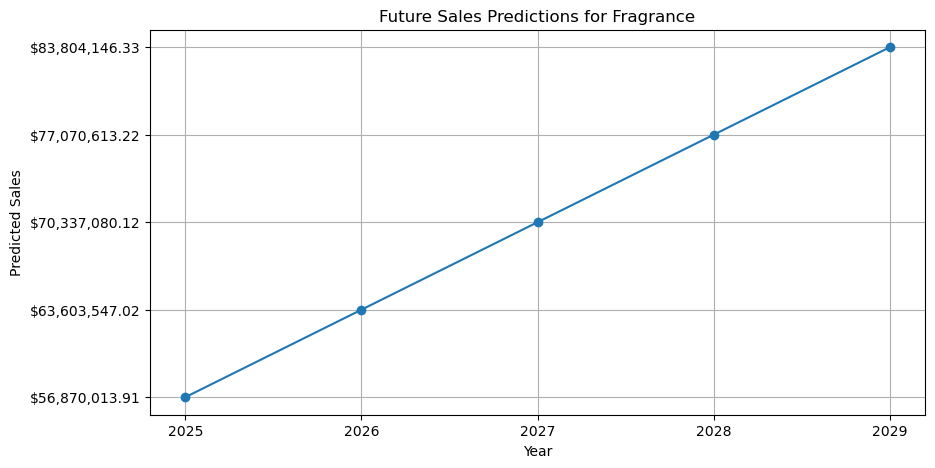

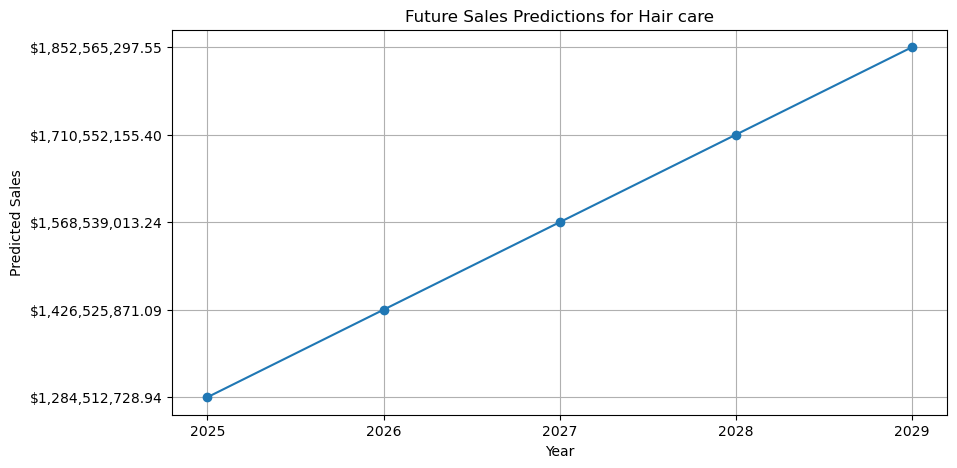

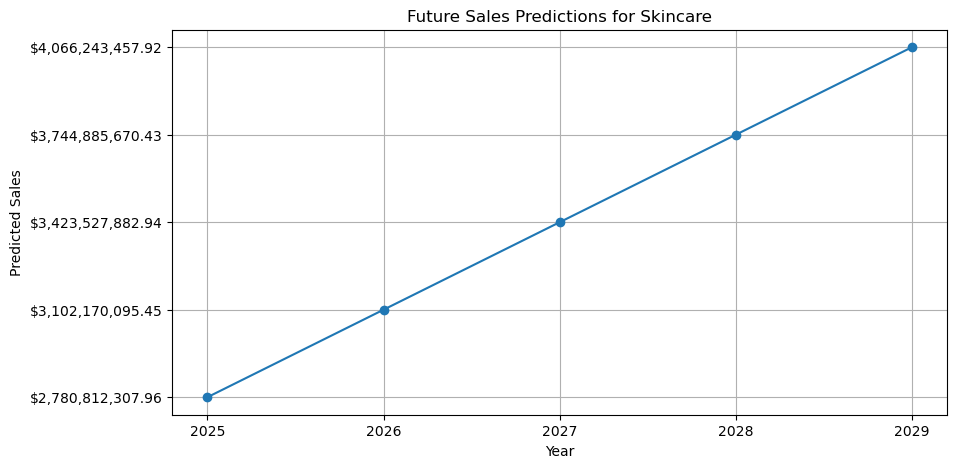

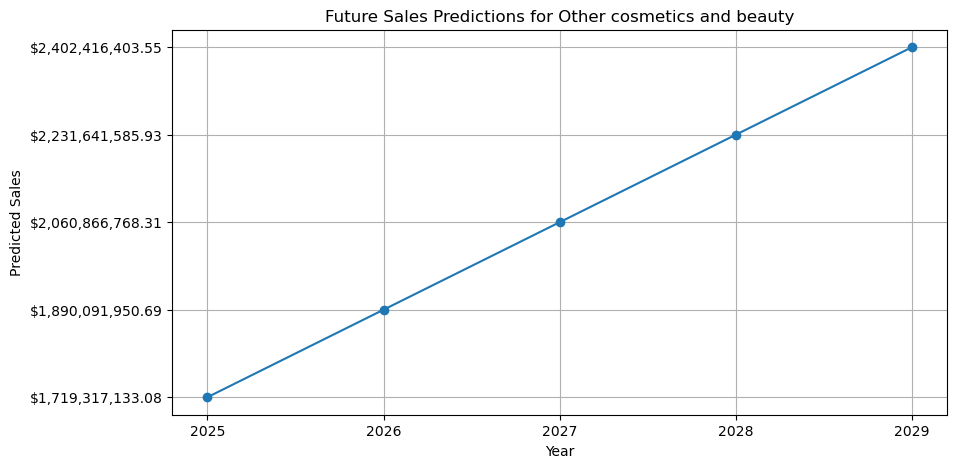

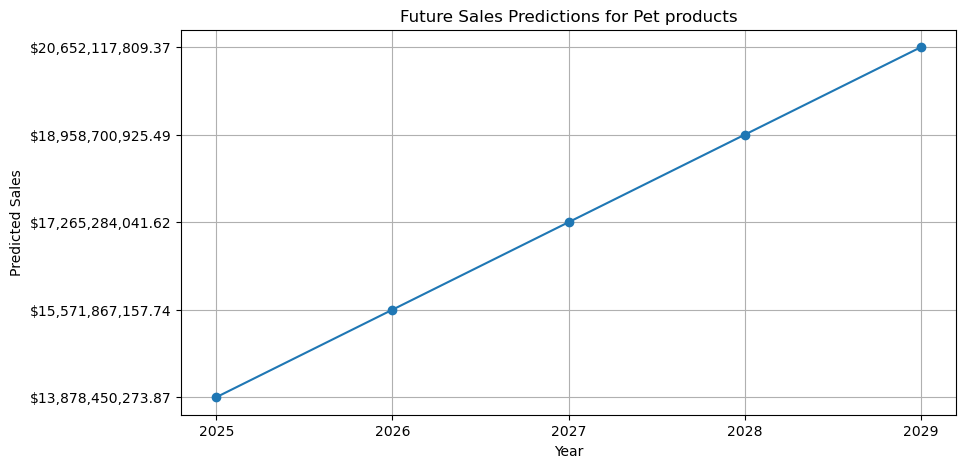

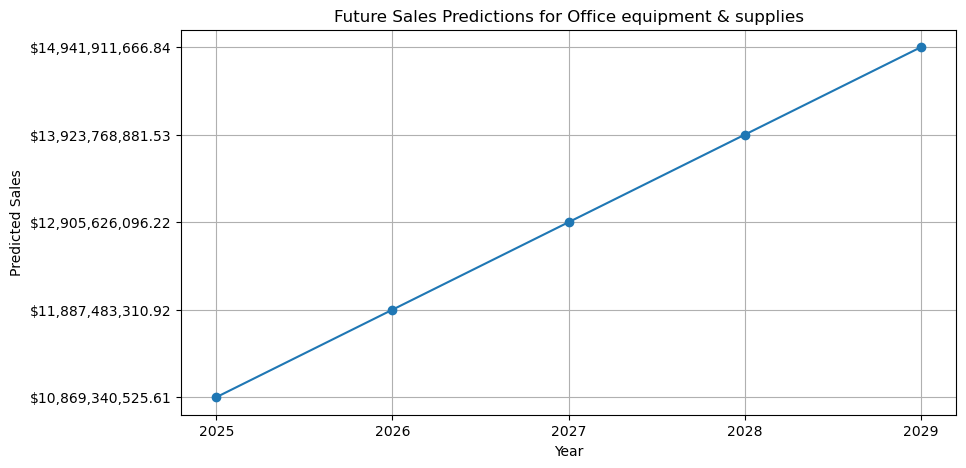

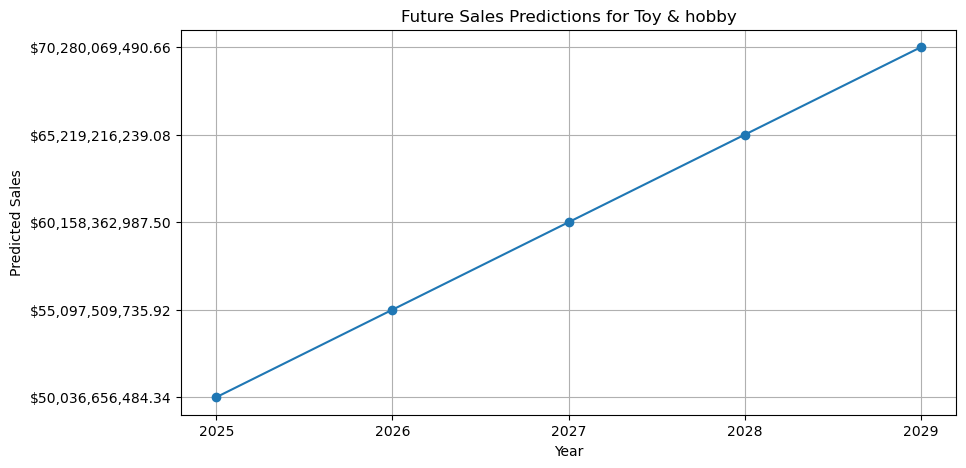

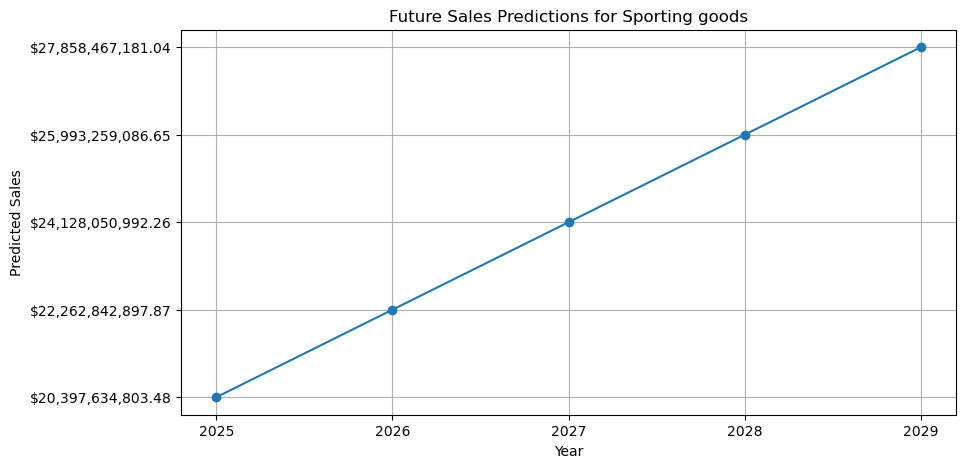

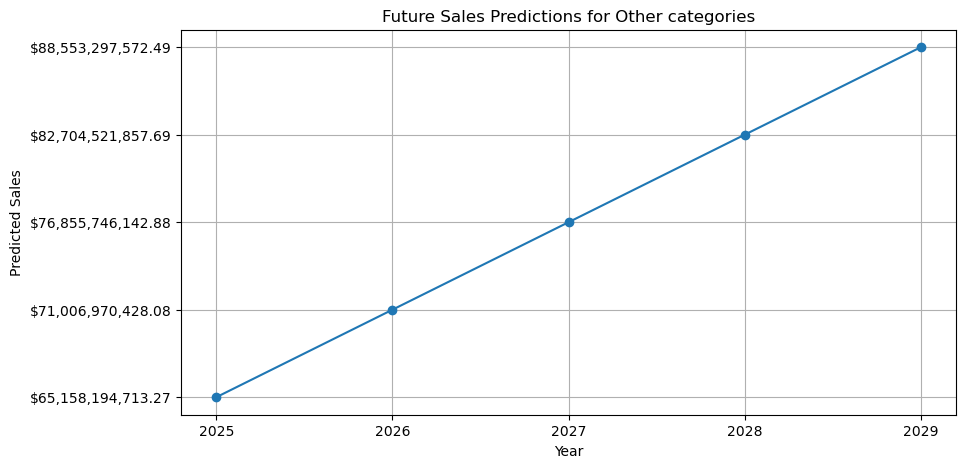

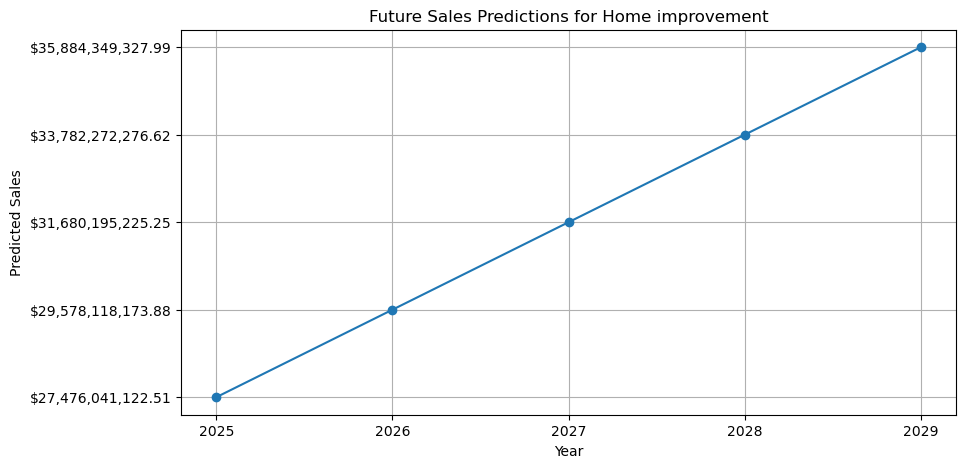

In [33]:
import matplotlib.pyplot as plt

# Plotting predictions for each category
for category in categories:
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_years, predictions_dict[category], marker='o', linestyle='-')
    plt.title(f'Future Sales Predictions for {category}')
    plt.xlabel('Year')
    plt.ylabel('Predicted Sales')
    plt.grid(True)
    plt.xticks(prediction_years)
    plt.show()

## Compare the Predicted and Forecasted Data

In [40]:
# Load the forecast dataset
file_path_2025 = '/Users/sakshiagarwal/Documents/Capstone/Sales with 2025 data, by Product Category-2.csv'  # Adjust the path as needed
df_2025 = pd.read_csv(file_path_2025)

print(df_2025['2025'])

0      $84,285,681,067.92 
1      $68,608,544,389.29 
2       $7,669,996,977.18 
3         $269,714,179.42 
4       $8,007,139,701.45 
5      $12,210,617,898.30 
6      $62,673,967,973.58 
7     $113,461,493,745.28 
8      $45,724,981,979.35 
9      $67,623,050,272.19 
10        $113,461,493.75 
11     $24,961,528,623.96 
12     $66,185,871,351.41 
13     $58,891,918,182.07 
14      $7,655,949,363.67 
15      $1,678,419,668.19 
16         $58,891,918.18 
17      $1,342,735,734.55 
18      $2,944,595,909.10 
19      $1,631,306,133.64 
20     $13,075,086,422.07 
21     $11,346,149,374.53 
22     $47,815,915,221.22 
23     $19,078,550,173.27 
24     $58,459,683,920.19 
25     $21,630,083,050.47 
Name: 2025, dtype: object


In [36]:
Both the predicted and forecasted values are very close validating the model's forecasts

In [42]:
# Load the dataset
file_path = '/Users/sakshiagarwal/Documents/Capstone/Sales Growth, by Product Category.csv'  
df_growth = pd.read_csv(file_path)

In [46]:
# Convert percentage strings to float values
for col in df_growth.columns:
    df_growth[col] = df_growth[col].str.rstrip('%').astype('float') / 100

# Check the transformation
print(df_growth.head())

                                  2017    2018    2019    2020    2021  \
Metric                                                                   
Apparel footwear & accessories  0.2845  0.2144  0.2070  0.3758  0.1932   
Apparels                           NaN     NaN  0.2123  0.3996  0.2068   
Apparel Accessories                NaN     NaN  0.1922  0.2020  0.1453   
Jewelry                            NaN     NaN  0.2070  0.3758  0.1932   
Footwear                           NaN     NaN  0.1850  0.3885  0.1385   

                                  2022    2023    2024    2025  
Metric                                                          
Apparel footwear & accessories  0.0851  0.0955  0.1200  0.1132  
Apparels                        0.0879  0.1010  0.1255  0.1187  
Apparel Accessories             0.0842  0.0841  0.0964  0.0893  
Jewelry                        -0.1536 -0.0449  0.0706  0.0961  
Footwear                        0.0643  0.0633  0.0973  0.0903  


In [47]:
# Calculate the correlation matrix again
correlation_matrix = df_growth.corr()

# Display the correlation matrix
print(correlation_matrix)

          2017      2018      2019      2020      2021      2022      2023  \
2017  1.000000  0.900760  0.771879  0.864408  0.529550  0.657701  0.374672   
2018  0.900760  1.000000  0.827349  0.825339  0.229338  0.548746  0.229810   
2019  0.771879  0.827349  1.000000  0.495668  0.453048  0.084017  0.050092   
2020  0.864408  0.825339  0.495668  1.000000  0.388429  0.040488 -0.007278   
2021  0.529550  0.229338  0.453048  0.388429  1.000000  0.126130  0.083201   
2022  0.657701  0.548746  0.084017  0.040488  0.126130  1.000000  0.909366   
2023  0.374672  0.229810  0.050092 -0.007278  0.083201  0.909366  1.000000   
2024  0.244011  0.004616 -0.179003 -0.358016  0.045809  0.791992  0.814098   
2025  0.190993 -0.021177 -0.126877 -0.331231  0.096128  0.735482  0.785447   

          2024      2025  
2017  0.244011  0.190993  
2018  0.004616 -0.021177  
2019 -0.179003 -0.126877  
2020 -0.358016 -0.331231  
2021  0.045809  0.096128  
2022  0.791992  0.735482  
2023  0.814098  0.785447  
202

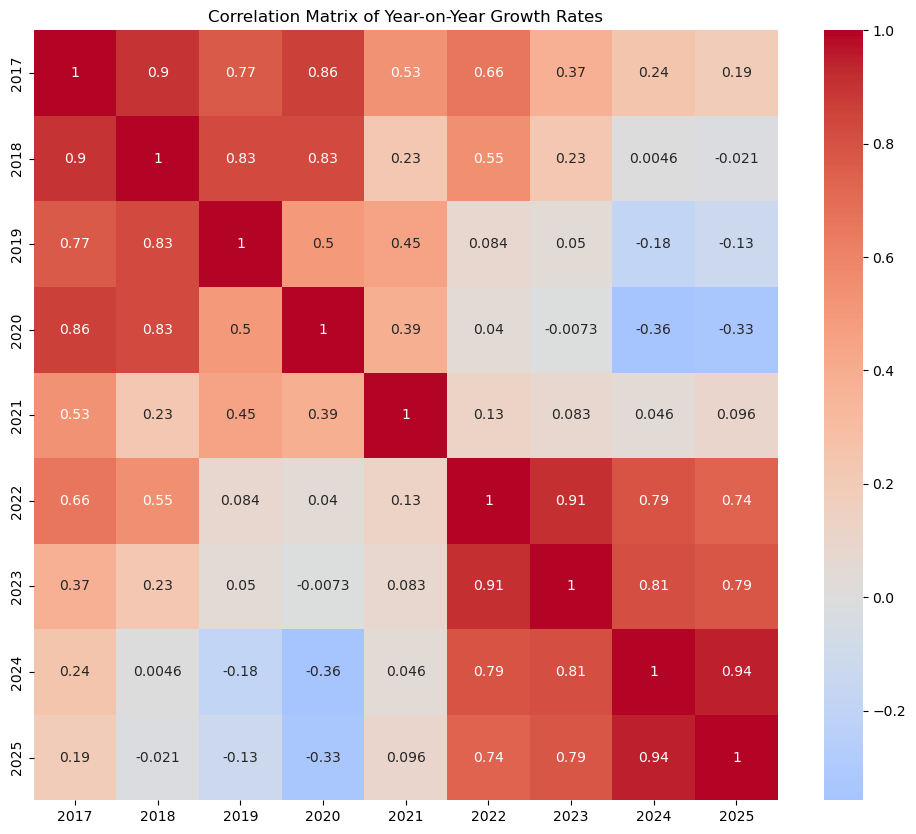

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Year-on-Year Growth Rates')
plt.show()

Numbers close to 1 imply a strong positive correlation. 
The year 2017 has a strong positive correlation with 2018, suggesting that growth rates in these two years 
moved in the same direction.
This could mean that factors affecting growth rates were consistent across these years for the product categories.

Numbers less than 0 and closer to -1 indicate a negative correlation. 
The year 2020 seems to have a moderately negative correlation with 2024 and 2025, which might suggest that categories that did well or poorly in 2020 tended to do the opposite in 2024 and 2025.

In [49]:
# Calculate the average growth rate for each category
df_growth['Average Growth'] = df_growth.mean(axis=1)

# Sort categories based on average growth rate to find the top performers
dominant_categories = df_growth.sort_values('Average Growth', ascending=False)
print("Dominant Categories based on Average Growth:")
print(dominant_categories['Average Growth'])

Dominant Categories based on Average Growth:
Metric
Pet products                       0.310933
Food & beverage                    0.294967
Health personal care & beauty      0.257722
Fragrance                          0.252671
Skincare                           0.244229
Furniture & home furnishings       0.224300
Cosmetics and beauty               0.219629
Cosmetics                          0.218900
Hair care                          0.216343
Toy & hobby                        0.209022
Other cosmetics and beauty         0.187857
Apparel footwear & accessories     0.187633
Home improvement                   0.185300
Other categories                   0.180033
Apparels                           0.178829
Sporting goods                     0.171000
Books music & video                0.155122
Footwear                           0.146743
Auto & parts                       0.144956
Office equipment & supplies        0.142478
Computer & Consumer Electronics    0.137344
Consumer electronics    

In [56]:
df_growth_transposed = df_growth.transpose()

# Ensure all data are strings and then convert percentage strings to float values
df_growth_transposed = df_growth_transposed.applymap(
    lambda x: float(x.rstrip('%')) / 100 if isinstance(x, str) and '%' in x else x
)

correlation_matrix = df_growth_transposed.corr()

# Display the correlation matrix
print(correlation_matrix)

Metric                           Apparel footwear & accessories  Apparels  \
Metric                                                                      
Apparel footwear & accessories                         1.000000  0.997476   
Apparels                                               0.997476  1.000000   
Apparel Accessories                                    0.899476  0.892091   
Jewelry                                                0.904524  0.905000   
Footwear                                               0.987976  0.988726   
Auto & parts                                           0.845269  0.837179   
Books music & video                                    0.886287  0.937835   
Computer & Consumer Electronics                        0.948238  0.943394   
Computer                                               0.971620  0.973723   
Consumer electronics                                   0.890348  0.891904   
Large appliances                                       0.942685  0.944545   

In [58]:
# Define a threshold for strong correlation
threshold = 0.5  # This can be adjusted based on how strict you want the definition of a strong correlation to be

# Initialize a dictionary to hold the count of strong correlations for each category
strong_correlation_counts = {}

# Iterate over each category in the correlation matrix
for category in correlation_matrix.columns:
    # Count the number of strong correlations for the category, ignoring the self-correlation on the diagonal
    strong_correlations = sum(correlation_matrix[category] > threshold) - 1  # Subtract 1 to exclude self-correlation
    strong_correlation_counts[category] = strong_correlations

# Sort categories by the number of strong correlations in descending order
sorted_influencers = sorted(strong_correlation_counts.items(), key=lambda item: item[1], reverse=True)

# Display the sorted categories and their counts of strong correlations
for category, count in sorted_influencers:
    print(f"{category} has {count} strong correlations with other categories")

Apparel footwear & accessories has 24 strong correlations with other categories
Apparels has 24 strong correlations with other categories
Footwear has 24 strong correlations with other categories
Auto & parts has 24 strong correlations with other categories
Books music & video has 24 strong correlations with other categories
Computer & Consumer Electronics has 24 strong correlations with other categories
Computer has 24 strong correlations with other categories
Large appliances has 24 strong correlations with other categories
Food & beverage has 24 strong correlations with other categories
Furniture & home furnishings has 24 strong correlations with other categories
Cosmetics and beauty has 24 strong correlations with other categories
Skincare has 24 strong correlations with other categories
Other cosmetics and beauty has 24 strong correlations with other categories
Pet products has 24 strong correlations with other categories
Toy & hobby has 24 strong correlations with other categorie

A high degree of interconnectedness in the growth rates of these categories, except for "Office equipment & supplies"


In [59]:
# Define a higher threshold for strong correlation
threshold = 0.7

# Use a dictionary to count the number of strong correlations for each category
strong_correlation_counts = {}

# Iterate over the categories in the correlation matrix
for category in correlation_matrix.columns:
    # Sum the number of correlations above the threshold for each category (excluding the self-correlation)
    strong_correlation_counts[category] = (correlation_matrix[category] > threshold).sum() - 1

# Sort categories by the number of strong correlations in descending order
sorted_influencers = sorted(strong_correlation_counts.items(), key=lambda item: item[1], reverse=True)

# Display the categories and the number of strong correlations they have
for category, count in sorted_influencers:
    print(f"{category} has {count} strong correlations with other categories")


Apparel footwear & accessories has 24 strong correlations with other categories
Apparels has 24 strong correlations with other categories
Footwear has 24 strong correlations with other categories
Toy & hobby has 24 strong correlations with other categories
Other categories has 24 strong correlations with other categories
Food & beverage has 23 strong correlations with other categories
Furniture & home furnishings has 23 strong correlations with other categories
Pet products has 23 strong correlations with other categories
Books music & video has 22 strong correlations with other categories
Sporting goods has 22 strong correlations with other categories
Home improvement has 21 strong correlations with other categories
Computer has 20 strong correlations with other categories
Other cosmetics and beauty has 20 strong correlations with other categories
Computer & Consumer Electronics has 18 strong correlations with other categories
Large appliances has 18 strong correlations with other cat